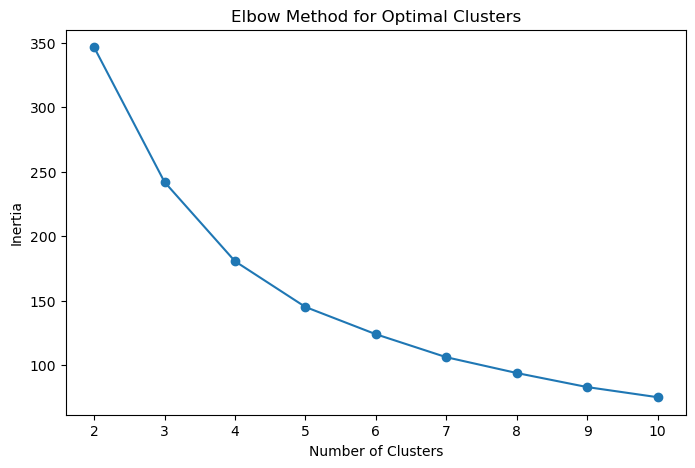

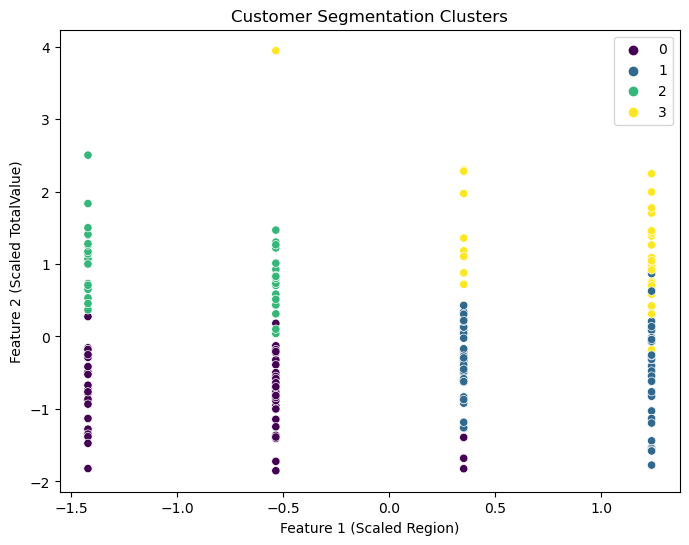

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('/Users/aman_r/Documents/Data Science Assignment/DataSets/Customers.csv')
transactions = pd.read_csv('/Users/aman_r/Documents/Data Science Assignment/DataSets/Transactions.csv')

# Merge Customers and Transactions for feature preparation
merged_data = transactions.merge(customers, on='CustomerID')

# Encode categorical variables
merged_data['Region_Encoded'] = merged_data['Region'].astype('category').cat.codes

# Aggregate features for clustering
customer_features = merged_data.groupby('CustomerID').agg({
    'Region_Encoded': 'first',
    'TotalValue': 'sum',
    'Quantity': 'sum',
}).reset_index()

# Normalize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['Region_Encoded', 'TotalValue', 'Quantity']])

# Determine optimal clusters using the Elbow Method
inertia = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.show()

# Perform K-Means clustering with optimal clusters (e.g., 4 based on elbow method)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the customer_features DataFrame
customer_features['Cluster'] = cluster_labels

# Evaluate clustering with Davies-Bouldin Index and Silhouette Score
db_index = davies_bouldin_score(scaled_features, cluster_labels)
silhouette_avg = silhouette_score(scaled_features, cluster_labels)

# Visualize clusters in 2D space (using the first two features)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 0], 
    y=scaled_features[:, 1], 
    hue=cluster_labels, 
    palette='viridis',
    legend='full'
)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Feature 1 (Scaled Region)')
plt.ylabel('Feature 2 (Scaled TotalValue)')
plt.show()